# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\visha\\Desktop\\Final Project\\INSTAGRAM\\Influencer.csv")
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [3]:
df['Channel Info'] = df['Channel Info'].str.replace('\n', '')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

## Missing Data Handling

In [6]:
df['Country Or Region'].unique()

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [7]:
df['Country Or Region'].value_counts()

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country Or Region, dtype: int64

In [8]:
mode_value = df['Country Or Region'].mode()[0]
mode_value

'United States'

In [9]:
df['Country Or Region'] = df['Country Or Region'].fillna(mode_value)

In [10]:
df['Country Or Region'].isnull().sum()

0

In [11]:
df['Country Or Region'].value_counts()

United States             128
Brazil                     13
India                      12
Indonesia                   7
France                      6
Spain                       5
United Kingdom              4
Colombia                    3
Canada                      3
Mexico                      2
Turkey                      2
Netherlands                 2
Switzerland                 1
Germany                     1
Czech Republic              1
British Virgin Islands      1
Sweden                      1
Australia                   1
Anguilla                    1
CÃ´te d'Ivoire              1
Puerto Rico                 1
United Arab Emirates        1
Italy                       1
Uruguay                     1
Russia                      1
Name: Country Or Region, dtype: int64

In [12]:
df.columns

Index(['Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

### Convert required Data Type

In [13]:
# Converting function

def to_numeric(value):
    multiplier = 1  # Default multiplier is 1
    if value[-1] == 'k':
        multiplier = 1000
    elif value[-1] == 'm':
        multiplier = 1000000
    elif value[-1] == 'b':
        multiplier = 1000000000
    
    try:
        return float(value[:-1]) * multiplier
    except ValueError:
        return None

In [14]:
df['Followers'] = df['Followers'].apply(to_numeric)

df['Avg. Likes'] = df['Avg. Likes'].apply(to_numeric)

In [15]:
df['Posts'] = df['Posts'].apply(to_numeric)

df['New Post Avg. Likes'] = df['New Post Avg. Likes'].apply(to_numeric)

df['Total Likes'] = df['Total Likes'].apply(to_numeric)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                200 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  199 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    200 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [17]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,91.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


### Summary Statistics

In [18]:
df.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,1.990000e+02,2.000000e+02
mean,100.500000,81.850000,7.849100e+07,1.785050e+06,3330.760000,0.019160,1.230234e+06,3.644949e+09
std,57.879185,8.875323,7.492015e+07,2.192133e+06,3443.485081,0.032577,1.860266e+06,5.563069e+09
min,1.000000,22.000000,3.340000e+07,6.350000e+04,2.000000,0.000000,1.750000e+04,2.280000e+07
25%,50.750000,80.000000,4.067500e+07,4.990500e+05,93.250000,0.004000,2.286000e+05,1.075000e+09
50%,100.500000,84.000000,5.095000e+07,1.100000e+06,2100.000000,0.009500,5.784000e+05,2.050000e+09
75%,150.250000,86.000000,7.050000e+07,2.125000e+06,5025.000000,0.017250,1.300000e+06,4.025000e+09
max,200.000000,93.000000,4.852000e+08,1.540000e+07,16900.000000,0.250000,1.290000e+07,5.740000e+10


## Data Visualization

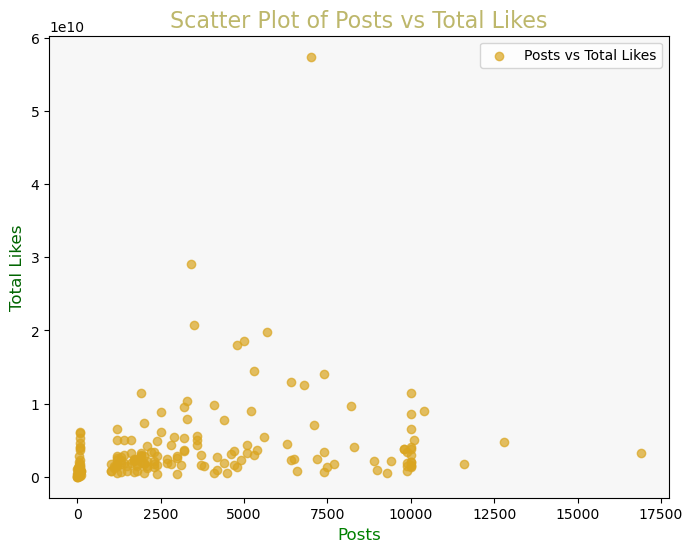

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df['Posts'], df['Total Likes'], alpha=0.7, c='goldenrod', marker='o', label='Posts vs Total Likes')

ax.set_facecolor((0.9, 0.9, 0.9, 0.3))


ax.set_title('Scatter Plot of Posts vs Total Likes', color='darkkhaki', fontsize=16)  
ax.set_xlabel('Posts', color='green', fontsize=12)  
ax.set_ylabel('Total Likes', color='darkgreen', fontsize=12)  
ax.legend()

# plt.grid(True)
plt.show()

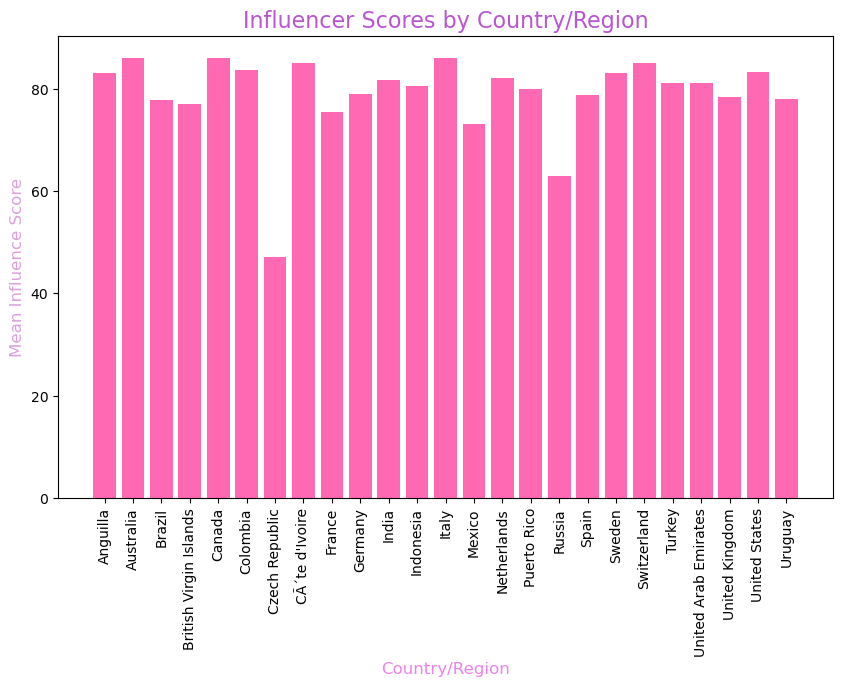

In [20]:
country_scores = df.groupby('Country Or Region')['Influence Score'].mean().reset_index()


plt.figure(figsize=(10, 6))

plt.bar(country_scores['Country Or Region'], country_scores['Influence Score'], color='hotpink')

plt.title('Influencer Scores by Country/Region', color='mediumorchid', fontsize=16)

plt.xlabel('Country/Region', color='violet', fontsize=12)
plt.ylabel('Mean Influence Score', color='plum', fontsize=12)


plt.xticks(rotation=90)
plt.show()

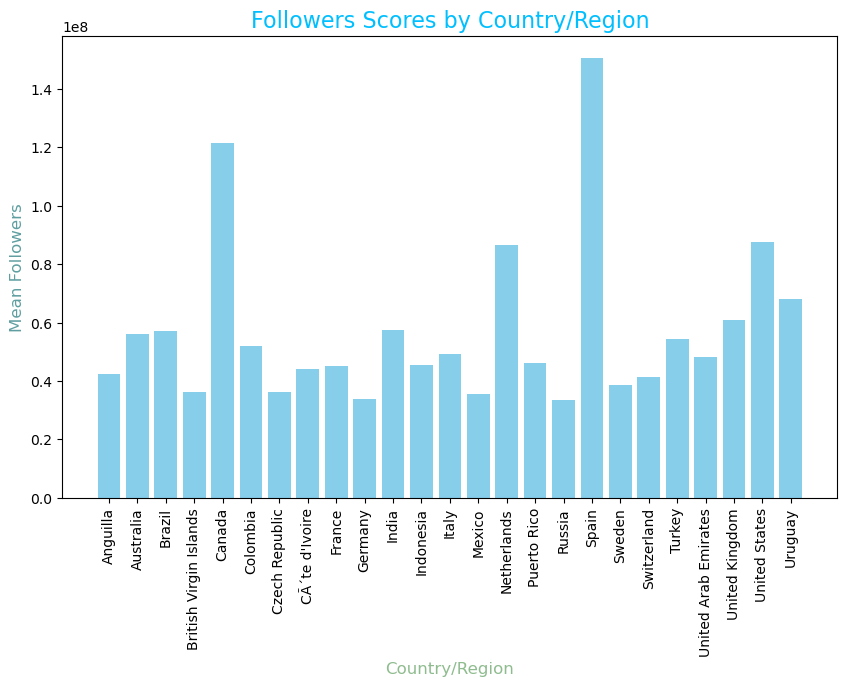

In [21]:
country_scores = df.groupby('Country Or Region')['Followers'].mean().reset_index()


plt.figure(figsize=(10, 6))

plt.bar(country_scores['Country Or Region'], country_scores['Followers'], color='skyblue')

plt.title('Followers Scores by Country/Region', color='deepskyblue', fontsize=16)

plt.xlabel('Country/Region', color='darkseagreen', fontsize=12)
plt.ylabel('Mean Followers', color='cadetblue', fontsize=12)


plt.xticks(rotation=90)
plt.show()

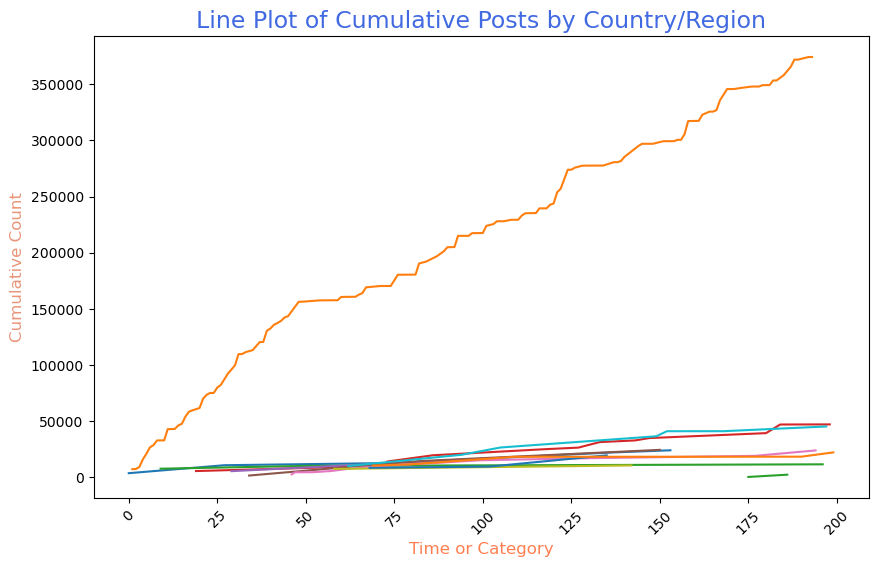

In [22]:
country_data = df.groupby('Country Or Region')[['Posts', 'Total Likes']].cumsum()  # cummulative sum
country_data['Country Or Region'] = df['Country Or Region'] 

plt.figure(figsize=(10, 6))


for country in country_data['Country Or Region'].unique():
    data_subset = country_data[country_data['Country Or Region'] == country]
    plt.plot(data_subset.index, data_subset['Posts'], label=f'{country} - Posts')

plt.title('Line Plot of Cumulative Posts by Country/Region', color='royalblue', fontsize=17)
plt.xlabel('Time or Category', color='coral', fontsize=12)
plt.ylabel('Cumulative Count', color='darksalmon', fontsize=12)
# plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0), borderaxespad=0)

# Show the plot
plt.xticks(rotation=45)
plt.show()

# QA Part

## 1) Are there any correlated features in the given dataset?

In [23]:
correlation = df.corr(numeric_only=True)
correlation

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.059337,0.028900,-0.270020,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.170405,-0.072460,0.031685,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.068185,-0.107439,0.259494,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.350093,0.789359,0.899820,0.361296
Posts,-0.059337,0.170405,0.068185,-0.350093,1.000000,-0.334560,-0.292471,0.237158
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334560,1.000000,0.866097,-0.001560
New Post Avg. Likes,-0.270020,0.031685,0.259494,0.899820,-0.292471,0.866097,1.000000,0.350097
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.237158,-0.001560,0.350097,1.000000


<Axes: >

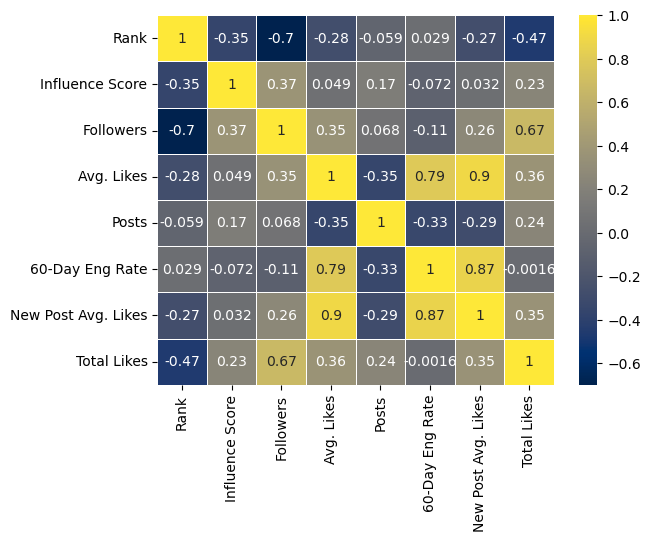

In [24]:
sns.heatmap(correlation, annot=True, cmap='cividis', linewidths=0.6)


In [25]:
highly_correlated = [
    ('New Post Avg. Likes', 'Avg. Likes', 0.9),
    ('60-Day Eng Rate', 'New Post Avg. Likes', 0.87),
    ('60-Day Eng Rate', 'Avg. Likes', 0.79),
    ('Total Likes', 'Followers', 0.67)
]

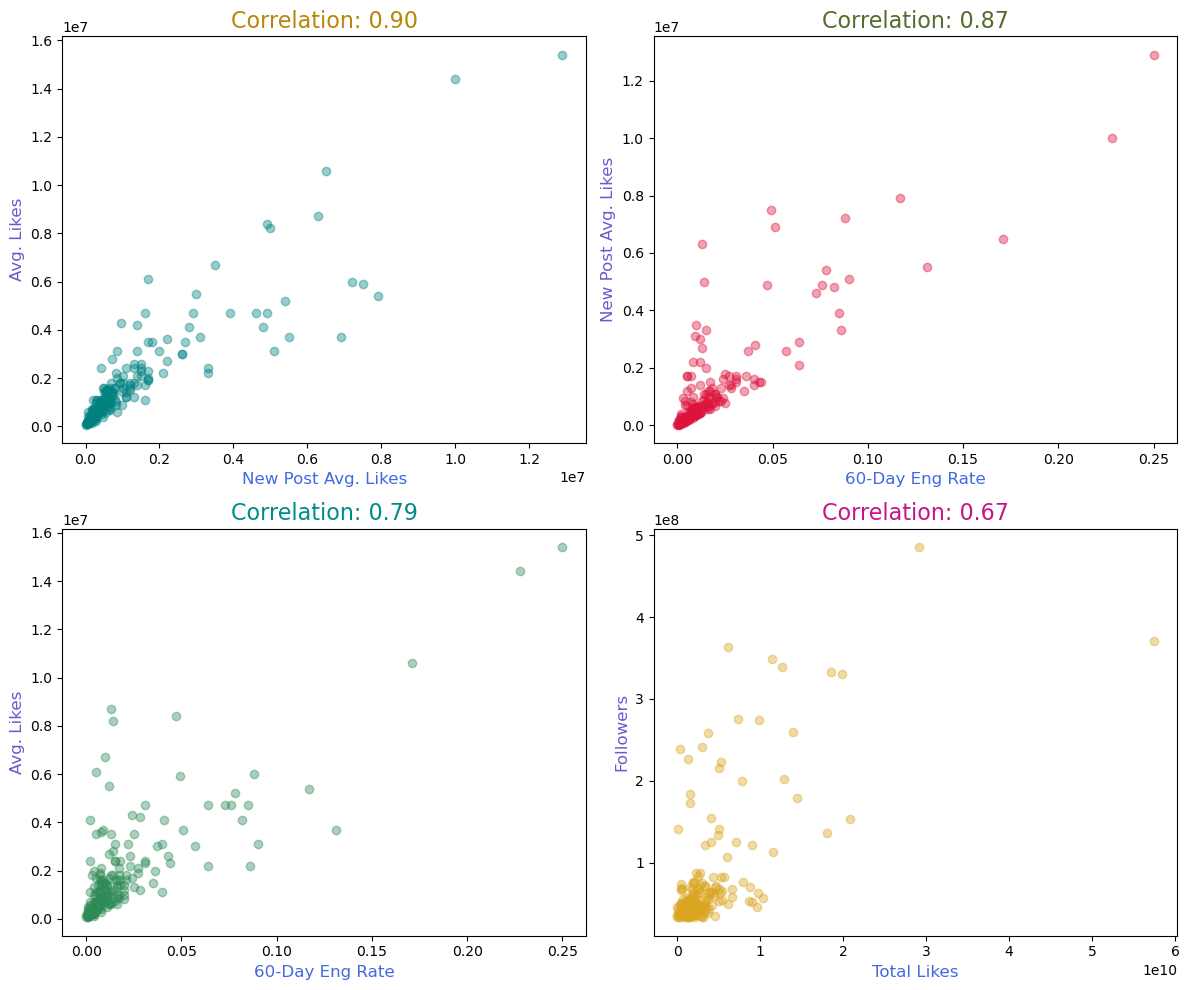

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

colors = ['teal', 'crimson', 'seagreen', 'goldenrod']
title = ['darkgoldenrod', 'darkolivegreen', 'darkcyan', 'mediumvioletred']

for i, (x_col, y_col, corr) in enumerate(highly_correlated):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Scatter plot
    ax.scatter(df[x_col], df[y_col], color=colors[i], marker='o', alpha=0.4)
    
    # Set title with correlation coefficient
    ax.set_title(f'Correlation: {corr:.2f}', color=title[i], fontsize=16)
    
    # Label axes
    ax.set_xlabel(x_col, color='royalblue', fontsize=12)
    ax.set_ylabel(y_col, color='slateblue', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## 2) What is the frequency distribution of the following features?
>>>> - Influence Score
>>>> - Followers
>>>> - Posts

###  Frequency Distribution for Influence Score

In [27]:
influence_score_distribution = df['Influence Score'].value_counts().reset_index().rename(columns={'index': 'Influence Score', 'Influence Score': 'Frequency'})

influence_score_distribution

,Influence Score,Frequency
0,85,30
1,83,20
2,86,19
3,84,18
4,82,12
5,80,12
6,87,9
7,81,9
8,90,7
9,88,7


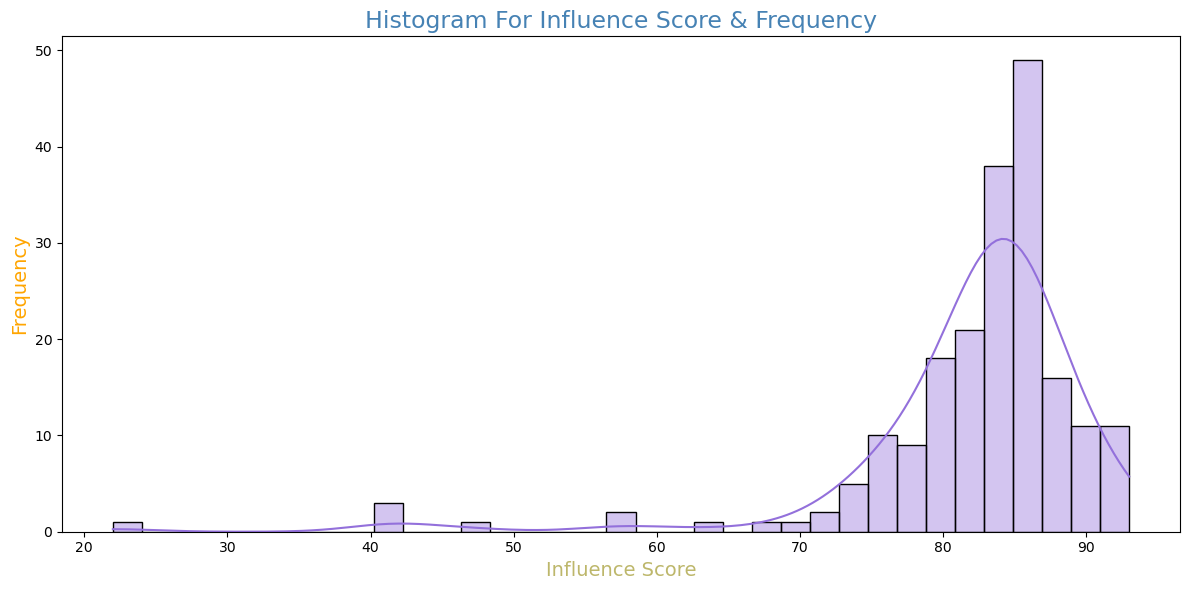

In [28]:
plt.figure(figsize=(12, 6))
# plt.subplot(131)
sns.histplot(data=df, x='Influence Score', color='mediumpurple', kde=True, common_norm=False, alpha=0.4)

plt.title('Histogram For Influence Score & Frequency', color='steelblue', fontsize=17)
plt.xlabel('Influence Score', color='darkkhaki', fontsize=14)
plt.ylabel('Frequency', color='orange', fontsize=14)

plt.tight_layout()
plt.show()

###  Frequency Distribution for Followers

In [29]:
followers_distribution = df['Followers'].value_counts().reset_index().rename(columns={'index': 'Followers', 'Followers': 'Frequency'})
followers_distribution

,Followers,Frequency
0,36000000.0,3
1,33600000.0,3
2,68100000.0,3
3,33800000.0,3
4,52900000.0,3
...,...,...
167,64700000.0,1
168,64400000.0,1
169,63600000.0,1
170,63400000.0,1


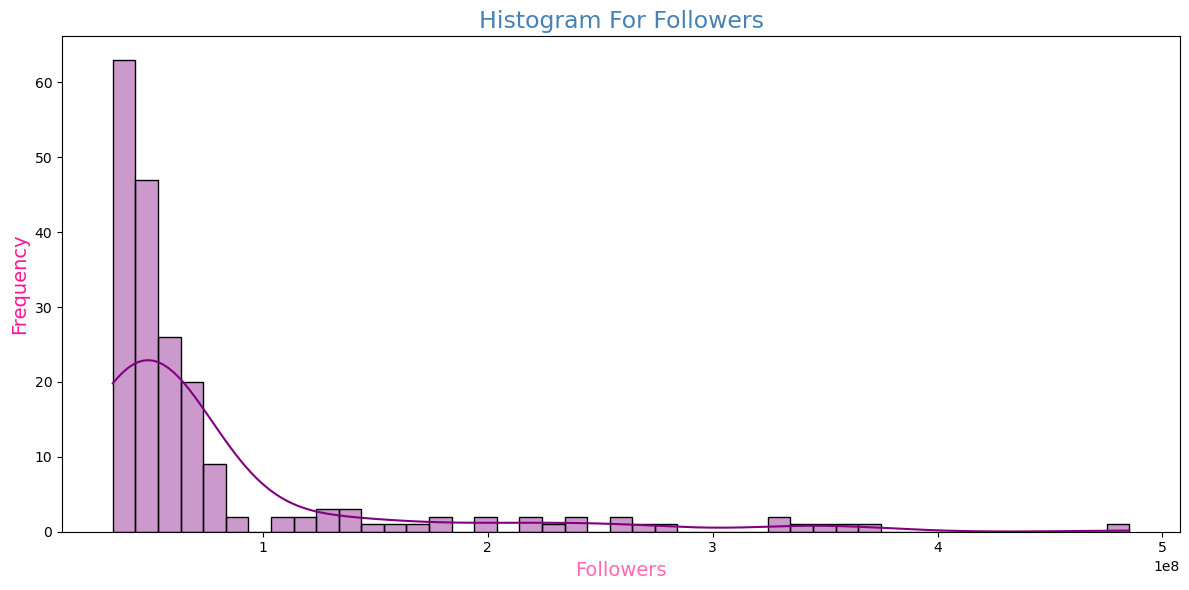

In [30]:
plt.figure(figsize=(12, 6))
# plt.subplot(131)
sns.histplot(data=df, x='Followers', color='purple', kde=True, common_norm=False, alpha=0.4)

plt.title('Histogram For Followers', color='steelblue', fontsize=17)
plt.xlabel('Followers', color='hotpink', fontsize=14)
plt.ylabel('Frequency', color='deeppink', fontsize=14)

plt.tight_layout()
plt.show()

###  Frequency Distribution for Posts

In [31]:
posts_distribution = df['Posts'].value_counts().reset_index().rename(columns={'index': 'Posts', 'Posts': 'Frequency'})
posts_distribution

,Posts,Frequency
0,10000.0,11
1,1200.0,9
2,2000.0,5
3,1900.0,5
4,2300.0,4
...,...,...
106,5600.0,1
107,66.0,1
108,7000.0,1
109,10100.0,1


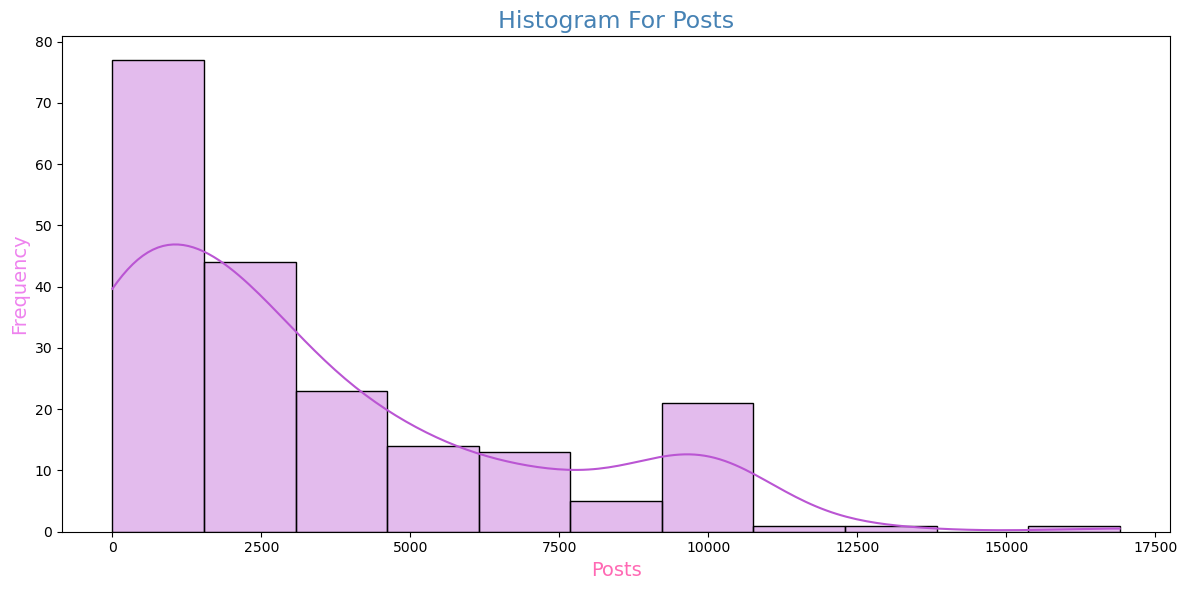

In [32]:
plt.figure(figsize=(12, 6))
# plt.subplot(131)
sns.histplot(data=df, x='Posts', color='mediumorchid', kde=True, common_norm=False, alpha=0.4)

plt.title('Histogram For Posts', color='steelblue', fontsize=17)
plt.xlabel('Posts', color='hotpink', fontsize=14)
plt.ylabel('Frequency', color='violet', fontsize=14)

plt.tight_layout()
plt.show()

#### Left-Skewed Distribution for Influencers:
>>This could imply that most influencers in this dataset have higher
influence scores, while there are a few with lower scores. 

>>The long tail on the left side represents outliers or influencers with exceptionally low influence scores.

#### Right-Skewed Distribution for Posts and Followers:
>>For "Posts," this could indicate that most influencers post infrequently, but there are a few who are extremely prolific. 

>>For "Followers," it suggests that many influencers have a moderate number of followers, but there are notable exceptions with a massive following.

## 3) Which country houses the highest number of Instagram Influencers?


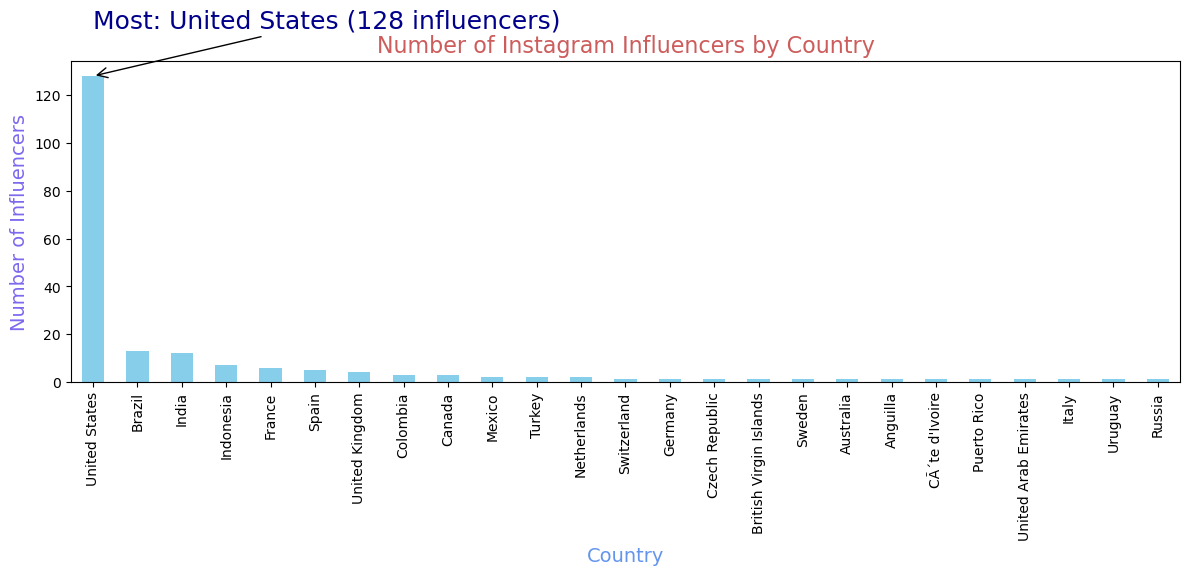

In [33]:
country_counts = df['Country Or Region'].value_counts()

# Identify the country with the highest count
top_country = country_counts.idxmax()
max_influencers = country_counts.max()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Instagram Influencers by Country', color='indianred', fontsize=16)
plt.xlabel('Country', color='cornflowerblue', fontsize=14)
plt.ylabel('Number of Influencers', color='mediumslateblue', fontsize=14)

# Annotate the country with the highest count
plt.annotate(f'Most: {top_country} ({max_influencers} influencers)', 
             xy=(0, max_influencers), 
             xytext=(0, max_influencers + 20),
             fontsize=18,
             color='darkblue',
             arrowprops=dict(arrowstyle='->', lw=1))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4) Who are the top 10 influencers in the given dataset based on the following features
>>>> - Followers
>>>> - Average likes
>>>> - Total Likes

### Top 10 'Influencers' based on 'Followers'

In [34]:
top_followers = df.sort_values(by='Followers', ascending=False).head(10)
top_followers[['Channel Info', 'Followers']]

,Channel Info,Followers
0,cristiano,485200000.0
1,kyliejenner,370700000.0
2,leomessi,363900000.0
3,selenagomez,348800000.0
4,therock,339400000.0
5,arianagrande,333000000.0
6,kimkardashian,330700000.0
7,beyonce,276100000.0
8,khloekardashian,273900000.0
9,justinbieber,260000000.0


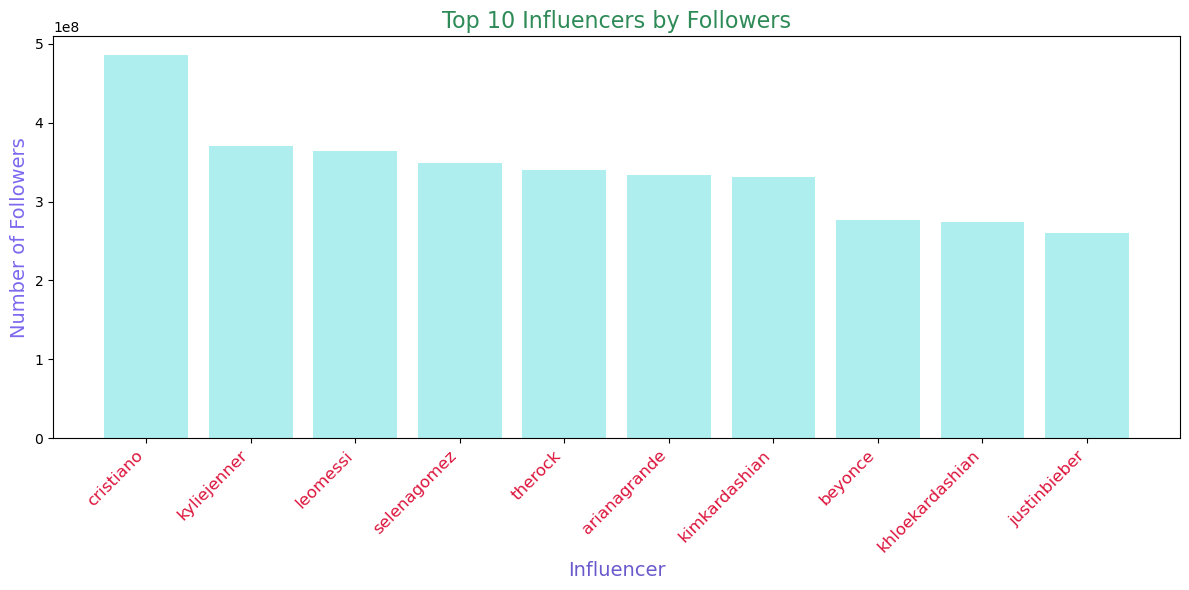

In [35]:
plt.figure(figsize=(12, 6))

plt.bar(top_followers['Channel Info'], top_followers['Followers'], color='paleturquoise')

plt.title('Top 10 Influencers by Followers', fontsize=16, color='seagreen')

plt.xlabel('Influencer', fontsize=14, color='slateblue')
plt.ylabel('Number of Followers', fontsize=14, color='mediumslateblue')

plt.xticks(rotation=45, ha='right', color='crimson', fontsize=12)  

plt.tight_layout()
plt.show()

### Top 10 'Influencers' based on 'Avg. Likes'

In [36]:
top_avg_likes = df.sort_values(by='Avg. Likes', ascending=False).head(10)
top_avg_likes[['Channel Info', 'Avg. Likes']]

,Channel Info,Avg. Likes
96,thv,15400000.0
131,j.m,14400000.0
165,rkive,10600000.0
0,cristiano,8700000.0
32,billieeilish,8400000.0
1,kyliejenner,8200000.0
2,leomessi,6700000.0
3,selenagomez,6100000.0
38,lalalalisa_m,6000000.0
22,zendaya,5900000.0


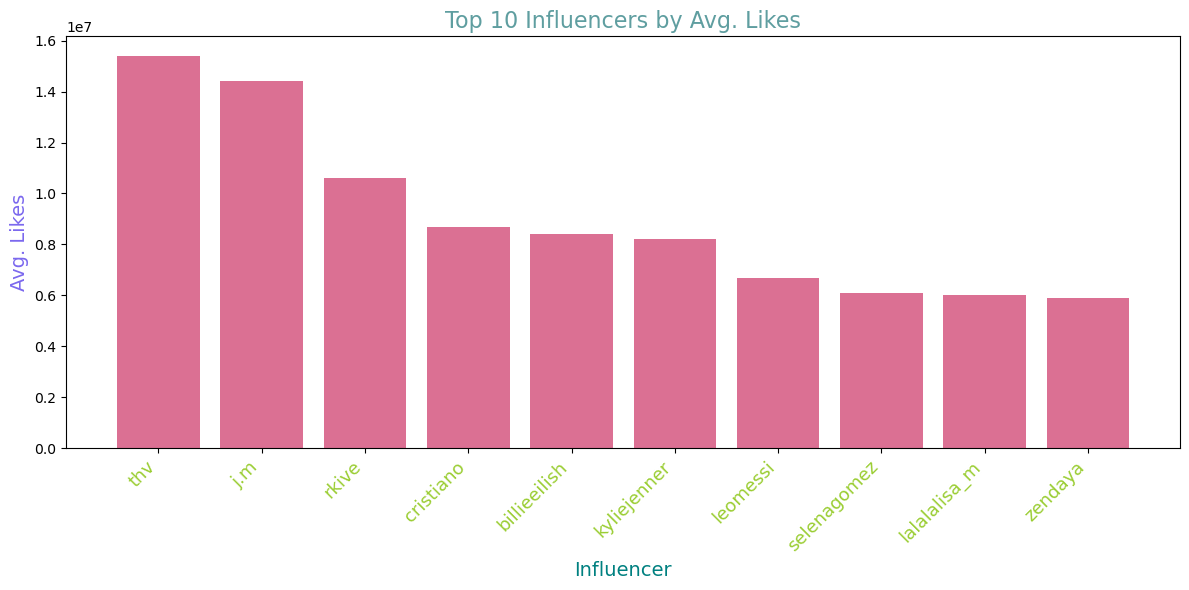

In [37]:
plt.figure(figsize=(12, 6))

plt.bar(top_avg_likes['Channel Info'], top_avg_likes['Avg. Likes'], color='palevioletred')

plt.title('Top 10 Influencers by Avg. Likes', fontsize=16, color='cadetblue')

plt.xlabel('Influencer', fontsize=14, color='teal')
plt.ylabel('Avg. Likes', fontsize=14, color='mediumslateblue')

plt.xticks(rotation=45, ha='right', color='yellowgreen', fontsize=13)  

plt.tight_layout()
plt.show()

### Top 10 'Influencers' based on 'Total Likes'

In [38]:
top_total_likes = df.sort_values(by='Total Likes', ascending=False).head(10)
top_total_likes[['Channel Info', 'Total Likes']]

,Channel Info,Total Likes
1,kyliejenner,5.740000e+10
0,cristiano,2.910000e+10
22,zendaya,2.080000e+10
6,kimkardashian,1.980000e+10
5,arianagrande,1.850000e+10
25,badgalriri,1.800000e+10
19,neymarjr,1.440000e+10
9,justinbieber,1.400000e+10
16,nickiminaj,1.290000e+10
4,therock,1.260000e+10


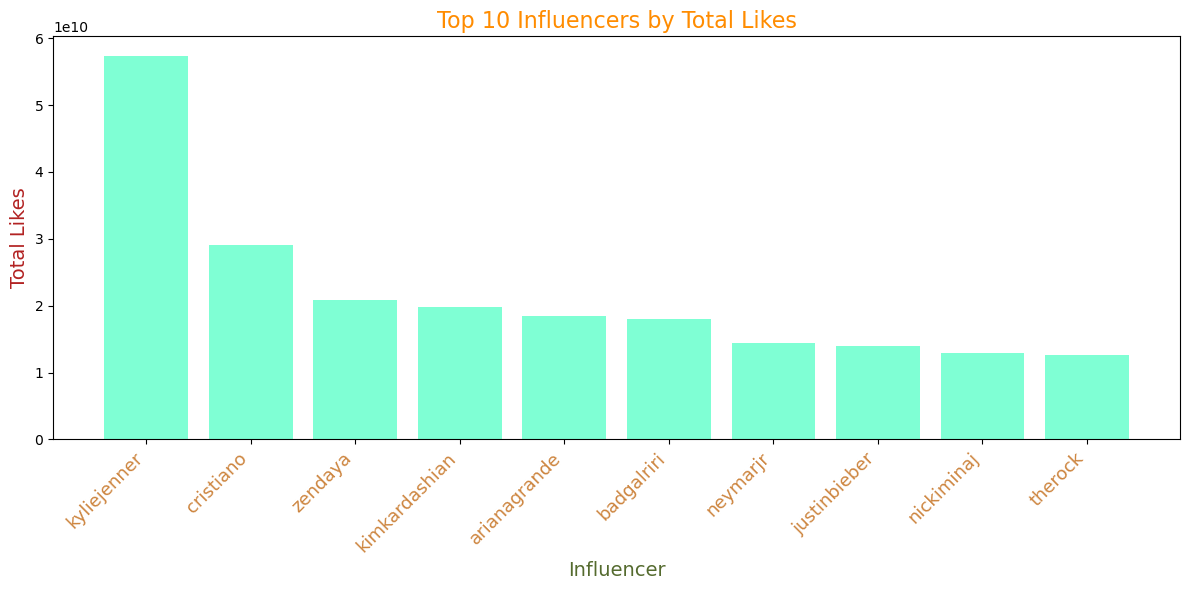

In [39]:
plt.figure(figsize=(12, 6))

plt.bar(top_total_likes['Channel Info'], top_total_likes['Total Likes'], color='aquamarine')

plt.title('Top 10 Influencers by Total Likes', fontsize=16, color='darkorange')

plt.xlabel('Influencer', fontsize=14, color='darkolivegreen')
plt.ylabel('Total Likes', fontsize=14, color='firebrick')

plt.xticks(rotation=45, ha='right', color='peru', fontsize=13)  

plt.tight_layout()
plt.show()

## 5) Describe the relationship between the following pairs of features using a suitable graph
>>>> - Followers and Total Likes
>>>> - Followers and Influence Score
>>>> - Posts and Average likes
>>>> - Posts and Influence Score

###  Relationship between Followers and Total Likes

Text(0, 0.5, 'Total Likes')

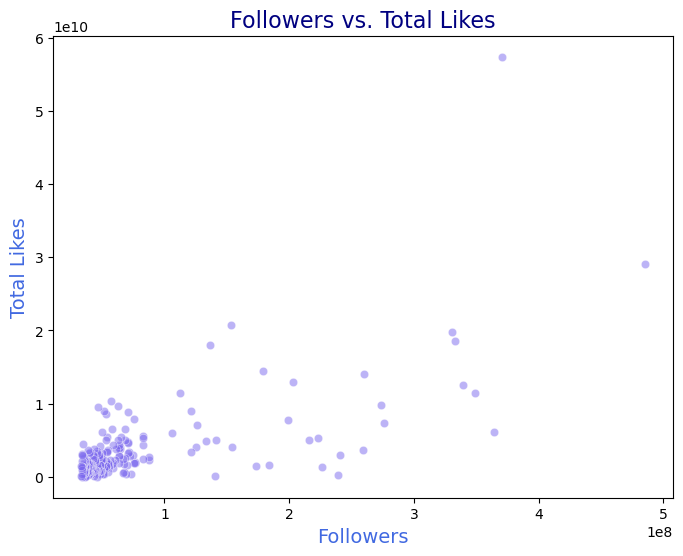

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Followers', y='Total Likes', color='mediumslateblue', alpha=0.5)
plt.title('Followers vs. Total Likes', fontsize=16, color='navy')
plt.xlabel('Followers', fontsize=14, color='royalblue')
plt.ylabel('Total Likes', fontsize=14, color='royalblue')
# plt.grid(True)

###  Relationship between Followers and Influence Score

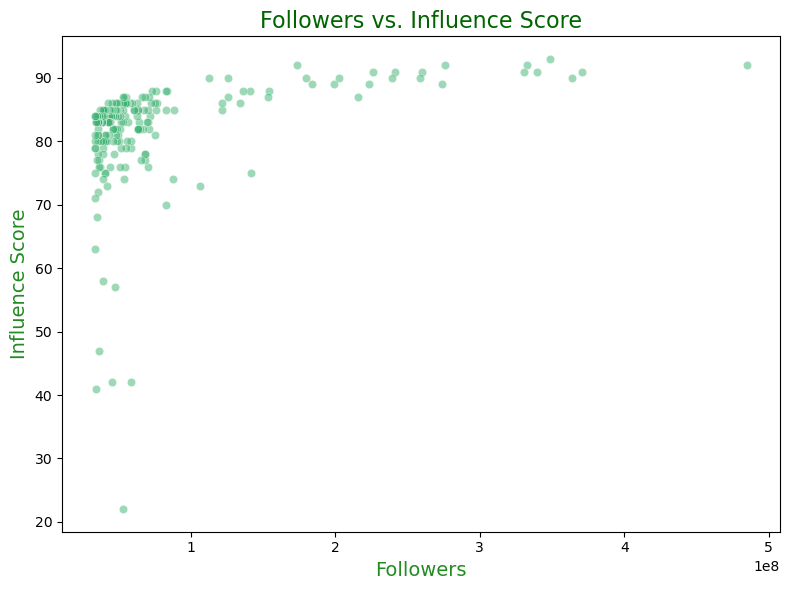

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Followers', y='Influence Score', color='mediumseagreen', alpha=0.5)
plt.title('Followers vs. Influence Score', fontsize=16, color='darkgreen')
plt.xlabel('Followers', fontsize=14, color='forestgreen')
plt.ylabel('Influence Score', fontsize=14, color='forestgreen')

plt.tight_layout()
plt.show()

###  Relationship between Posts and Average Likes

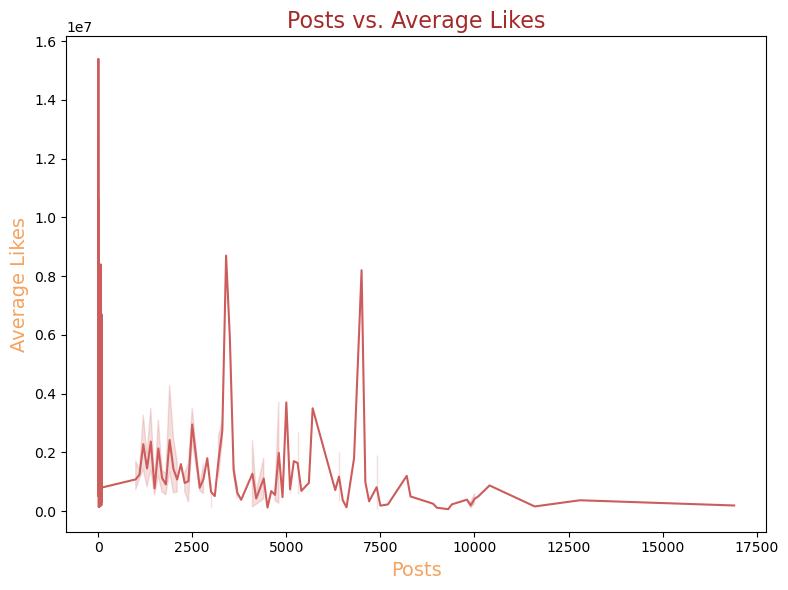

In [42]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Posts', y='Avg. Likes', color='indianred')
plt.title('Posts vs. Average Likes', fontsize=16, color='brown')
plt.xlabel('Posts', fontsize=14, color='sandybrown')
plt.ylabel('Average Likes', fontsize=14, color='sandybrown')
plt.tight_layout()

plt.show()

###  Relationship between Posts and Influence Score

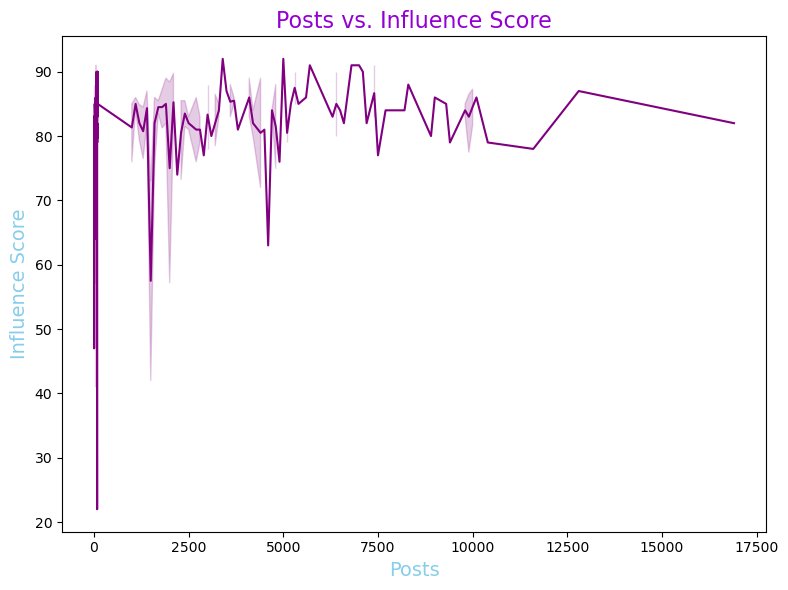

In [43]:
plt.figure(figsize=(8, 6))

sns.lineplot(data=df, x='Posts', y='Influence Score', color='purple')

plt.title('Posts vs. Influence Score', fontsize=16, color='darkviolet')
plt.xlabel('Posts', fontsize=14, color='skyblue')
plt.ylabel('Influence Score', fontsize=14, color='skyblue')

plt.tight_layout()
plt.show()

# Conclusion

1. **Correlation Analysis:** I conducted correlation analysis to identify any correlated features in the dataset. Notable correlations included a strong positive correlation between "Total Likes" and "Followers," as well as a moderate negative correlation between "Influence Score" and "Followers."

2. **Frequency Distributions:** I examined the frequency distributions of three essential features: "Influence Score," "Followers," and "Posts." The analysis revealed varying distributions for each feature, with "Followers" and "Posts" showing right-skewed distributions, indicating a majority of influencers with lower values and a few outliers with high counts.

3. **Geographic Distribution:** I determined which country housed the highest number of Instagram influencers and created a bar chart to visualize the counts of influencers in different countries. This analysis helps in understanding the global distribution of influencers in the dataset.

4. **Top Influencers:** I identified the top 10 influencers based on "Followers," "Average Likes," and "Total Likes." Creating bar charts for each feature allowed us to showcase the most influential and popular influencers in the dataset.

5. **Relationship Analysis:** I explored the relationships between feature pairs using suitable graphs. Scatter plots were used to examine the relationships between "Followers" and "Total Likes" as well as "Followers" and "Influence Score." Line plots were employed to analyze the relationships between "Posts" and "Average Likes" and "Posts" and "Influence Score." These visualizations unveiled patterns and correlations between these features.
